t =  2.0
q1 = -0.18918000000000013, k1 = 0.006194117647058808, q2 = -0.1836252922296023, k2 = -0.0029257039331315117, q3 = -0.18167688751589753, k3 = -0.0026498137128451236, q4 = -0.17449457930700296, k4 = -0.011291771986671693
x = 2.3676201768669993, y = 1.5572918850614057
t =  31.823529411764675
q1 = -0.19525115210750188, k1 = 0.029192356091679923, q2 = -0.195994380589872, k2 = 0.020109181150031352, q3 = -0.193612973168766, k3 = 0.020014822731251745, q4 = -0.19172423948923448, k4 = 0.010944048741132124
x = 2.598709249507694, y = 1.5577988960711393
t =  2.0
q1 = -0.09459000000000006, k1 = 0.003097058823529404, q2 = -0.09320836680075908, k2 = 0.0008193651809363933, q3 = -0.09295989730350639, k3 = 0.0008520574587153835, q4 = -0.09134308385828824, k4 = -0.0013821754540362353
x = 2.45695506465553, y = 1.5608429547747995
t =  31.911764705882398
q1 = -0.09741115138516082, k1 = 0.0100268270791374, q2 = -0.09692684397986912, k2 = 0.0077201295067542705, q3 = -0.09664212697578402, k3 = 0.007726

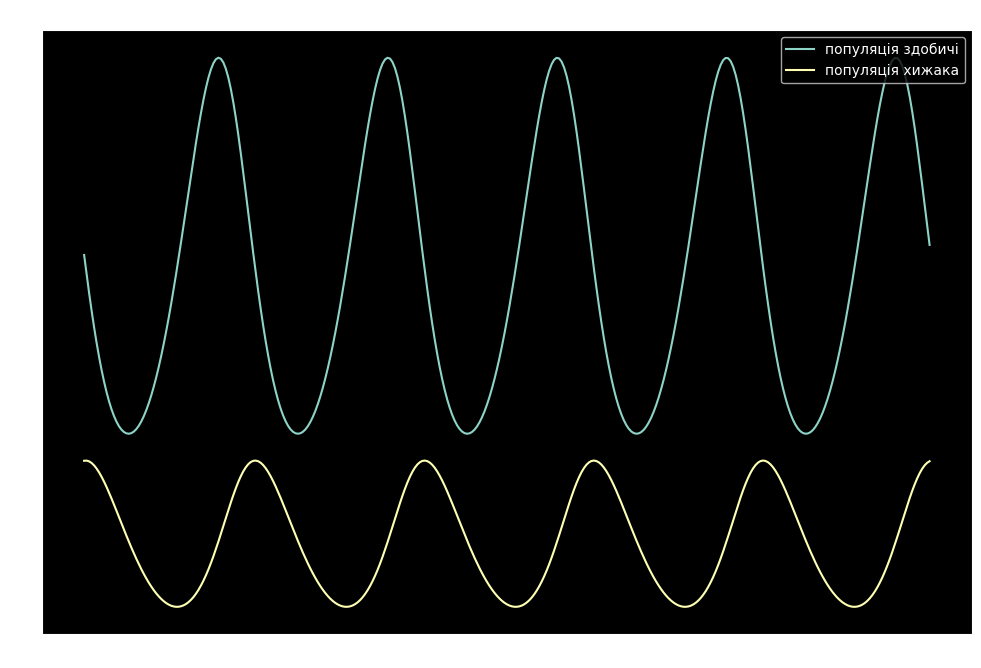

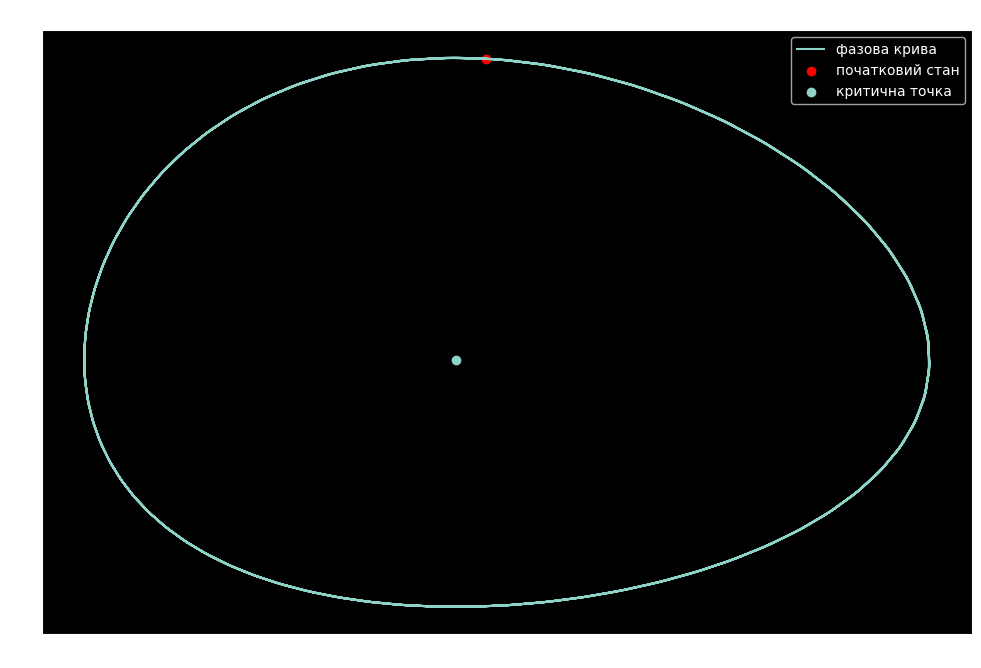

In [23]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

def Runge_Kutta(x0,y0,t0,tn,h,f1,f2):

    x,y = x0,y0
    X,Y = [x], [y]

    for t in np.arange(t0,tn,h):
        

        q1 = h*f1(x,y)
        k1 = h*f2(x,y)

        q2 = h*f1(x+(q1/2),y+(k1/2))
        k2 = h*f2(x+(q1/2),y+(k1/2))

        q3 = h*f1(x+(q2/2),y+(k2/2))
        k3 = h*f2(x+(q2/2),y+(k2/2))

        q4 = h*f1(x+q3,y+k3)
        k4 = h*f2(x+q3,y+k3)

        x = x + (1/6)*(q1 + 2 * q2 + 2 * q3 + q4)
        y = y + (1/6)*(k1 + 2 * k2 + 2 * k3 + k4)
        
        if t==np.arange(t0,tn,h)[0] or t==np.arange(t0,tn,h)[-1]:
            print("t = ", t)
            print("q1 = {}, k1 = {}, q2 = {}, k2 = {}, q3 = {}, k3 = {}, q4 = {}, k4 = {}".format(q1,k1,q2,k2,q3,k3,q4,k4))
            print("x = {}, y = {}".format(x, y))
        X.append(x)
        Y.append(y)

    return X,Y

def Lotka_Volterra(a,b,c,d,x0, y0, t0, tn,epsilon):
    h = epsilon ** (1/4)
    n = ceil((tn-t0)/h)

    if n % 2:
        n+=1
    h = (tn-t0)/n

    def f1(x,y): return a*x - b*x*y
    def f2(x,y): return -c*y + d*x*y

    X,Y = Runge_Kutta(x0,y0,t0,tn,h,f1,f2)	

    while True:
        h /= 2
        X2, Y2 = Runge_Kutta(x0,y0,t0,tn,h,f1,f2)
        print("X = ", X2)
        print("\n")
        print("Y = ", Y2)
        r1 = max([abs(x - x2) for x, x2 in zip(X, X2[::2])])
        r2 = max([abs(y - y2) for y, y2 in zip(Y, Y2[::2])])
        r = max(r1, r2)
        
        print("\n")
        print("R = ", r)
        X, Y = X2, Y2
        if r < epsilon:
            return X2, Y2, h, c / d, a / b


epsilon = 0.001
a,b,c,d = 1.28, 1.09, 0.87, 0.35
x0,y0 = 2.55, 1.56
t0,tn = 2, 32


plt.style.use('dark_background')
X2, Y2, h, xkr,ykr = Lotka_Volterra(a,b,c,d,x0, y0, t0, tn,epsilon)
T = np.arange(t0, tn + h / 2, h)
plt.title("Графіки популяцій з часом")
plt.plot(T, X2, label = 'популяція здобичі')
plt.plot(T, Y2, label = 'популяція хижака')
plt.legend(loc= 'upper right')
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Фазовий портрет популяцій")
plt.scatter(x0,y0, label = 'початковий стан', color='red')
plt.scatter(xkr,ykr, label = 'критична точка')

plt.plot(X2,Y2,label = 'фазова крива')
plt.legend(loc= 'upper right')
plt.show()


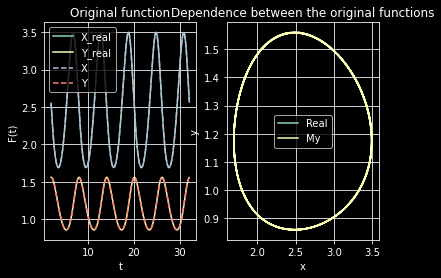

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import ceil

EPS = 1e-3
# epsilon = 0.001
a,b,c,d = 1.28, 1.09, 0.87, 0.35
x0,y0 = 2.55, 1.56
# t0,tn = 2, 32

# a = 1.25
# b = 0.65
# c = 0.85
# d = 0.35
# x0 = 2.51
# y0 = 1.52

start = 2
finish = 32

h = np.sqrt(np.sqrt(EPS))


def f1(t, x, y):
    return a*x-b*x*y


def f2(t, x, y):
    return -c*y+d*x*y

n = ceil(abs(start-finish)/h)
t_p = np.linspace(start, finish, n)


def pend(z, t, a, b, c, d):
    x, y = z
    dydt = [(a*x - b*x*y), (-c*y + d*x*y)]
    return dydt

sol = odeint(pend, [x0, y0], t_p,  args=(a, b, c, d))


def method_runge_kutta(h, x, y, t_0, t_1):
    n = ceil(abs(t_0-t_1)/h)
    t = [t_0]

    for i in range(n):
        t += [t[i]+h]

        k1 = h*f1(t[i], x[i], y[i])
        q1 = h*f2(t[i], x[i], y[i])

        k2 = h*f1(t[i] + h/2, x[i] + k1/2, y[i] + q1/2)
        q2 = h*f2(t[i] + h/2, x[i] + k1/2, y[i] + q1/2)

        k3 = h*f1(t[i] + h/2, x[i] + k2/2, y[i] + q2/2)
        q3 = h*f2(t[i] + h/2, x[i] + k2/2, y[i] + q2/2)

        k4 = h*f1(t[i] + h, x[i] + k3, y[i] + q3)
        q4 = h*f2(t[i] + h, x[i] + k3, y[i] + q3)

        x.append(x[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        y.append(y[i] + (q1 + 2*q2 + 2*q3 + q4)/6)

    return t, x, y


def runge_rules(t_1, t_2, x_1, x_2):
    r = 0
    for i in range(len(t_2)):
        for j in range(len(t_1)):
            if i/2 == j:
                r = max(r, abs(x_1[i]-x_2[j]))
            else:
                break
    return r


delta = 1
while delta > EPS:
    t_1, x_1, y_1 = method_runge_kutta(h, [x0], [y0], start, finish)
    t_2, x_2, y_2 = method_runge_kutta(h/2, [x0], [y0], start, finish)
    delta = max(runge_rules(t_1, t_2, x_1, x_2),
                runge_rules(t_1, t_2, y_1, y_2))

fig, axes = plt.subplots(1, 2, subplot_kw=dict())

axes[0].plot(t_p, sol[:, 0], label='X_real')
axes[0].plot(t_p, sol[:, 1], label='Y_real')
axes[0].plot(t_1, x_1, '--',  label="X")
axes[0].plot(t_1, y_1, '--',  label="Y")
axes[0].set(title='Original function', xlabel='t', ylabel='F(t)')



axes[1].plot(sol[:, 0], sol[:, 1], label='Real')
axes[1].plot(x_1, y_1, label='My')
axes[1].set(title='Dependence between the original functions', xlabel='x', ylabel='y')


axes[0].grid(True)
axes[1].grid(True)
axes[0].legend()
axes[1].legend()
plt.show()